# Data Preprocessing:

## 1.	Import the necessary libraries and read the data.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from pandas import DataFrame as df
import os
import itertools

In [2]:
fifa1=pd.read_csv('fifa_+variable_information.csv')
fifa1.head()

,ID,unique id for every player
0,Name,name
1,Age,age
2,Photo,url to the player's photo
3,Nationality,nationality
4,Flag,url to players's country flag


In [3]:
fifa=pd.read_csv('fifa.csv')
fifa.head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [3]:
fifa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 60 columns):
ID                          18207 non-null int64
Name                        18207 non-null object
Age                         18207 non-null int64
Photo                       18207 non-null object
Nationality                 18207 non-null object
Flag                        18207 non-null object
Overall                     18207 non-null int64
Potential                   18207 non-null int64
Club                        17966 non-null object
Club Logo                   18207 non-null object
Value                       18207 non-null object
Wage                        18207 non-null object
Preferred Foot              18159 non-null object
International Reputation    18159 non-null float64
Weak Foot                   18159 non-null float64
Skill Moves                 18159 non-null float64
Work Rate                   18159 non-null object
Body Type                   18159 non-null

## 2.	Drop any columns that you deem unecessary for analysis.

In [4]:
fifa.drop(['Photo','Flag','Club Logo'],axis=1,inplace=True)

In [5]:
fifa.columns

Index(['ID', 'Name', 'Age', 'Nationality', 'Overall', 'Potential', 'Club',
       'Value', 'Wage', 'Preferred Foot', 'International Reputation',
       'Weak Foot', 'Skill Moves', 'Work Rate', 'Body Type', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'Crossing', 'Finishing', 'HeadingAccuracy',
       'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy',
       'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility',
       'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength',
       'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision',
       'Penalties', 'Composure', 'Marking', 'StandingTackle', 'SlidingTackle',
       'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes',
       'Release Clause'],
      dtype='object')

In [6]:
cat_cols=fifa.select_dtypes(include='object')
cat_cols.head(3)

,Name,Nationality,Club,Value,Wage,Preferred Foot,Work Rate,Body Type,Position,Joined,Loaned From,Contract Valid Until,Height,Weight,Release Clause
0,L. Messi,Argentina,FC Barcelona,€110.5M,€565K,Left,Medium/ Medium,Messi,RF,"Jul 1, 2004",NaN,2021,5'7,159lbs,€226.5M
1,Cristiano Ronaldo,Portugal,Juventus,€77M,€405K,Right,High/ Low,C. Ronaldo,ST,"Jul 10, 2018",NaN,2022,6'2,183lbs,€127.1M
2,Neymar Jr,Brazil,Paris Saint-Germain,€118.5M,€290K,Right,High/ Medium,Neymar,LW,"Aug 3, 2017",NaN,2022,5'9,150lbs,€228.1M


In [5]:
num_cols=fifa.select_dtypes(include=np.number)
num_cols.head(3)

,ID,Age,Overall,Potential,International Reputation,Weak Foot,Skill Moves,Jersey Number,Crossing,Finishing,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,158023,31,94,94,5.0,4.0,4.0,10.0,84.0,95.0,...,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0
1,20801,33,94,94,5.0,4.0,5.0,7.0,84.0,94.0,...,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0
2,190871,26,92,93,5.0,5.0,5.0,10.0,79.0,87.0,...,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0


## 3.	The following columns need to be converted for further analysis:

### Convert to Float after getting rid of currency symbol and suffix.

In [6]:
j=0
for i in fifa['Value'].values:
    fifa['Value'][j]=i[1:len(i)-1]
    j+=1
fifa['Value']=pd.to_numeric(fifa['Value'],errors='coerce')
fifa['Value']

0        110.5
1         77.0
2        118.5
3         72.0
4        102.0
         ...  
18202     60.0
18203     60.0
18204     60.0
18205     60.0
18206     60.0
Name: Value, Length: 18207, dtype: float64

### Convert to Float after getting rid of currency symbol and suffix.

In [7]:
k=0
for i in fifa['Wage'].values:
    fifa['Wage'][k]=i[1:len(i)-1]
    k+=1
fifa['Wage']=pd.to_numeric(fifa['Wage'])
fifa['Wage']

0        565.0
1        405.0
2        290.0
3        260.0
4        355.0
         ...  
18202      1.0
18203      1.0
18204      1.0
18205      1.0
18206      1.0
Name: Wage, Length: 18207, dtype: float64

### Convert to int with only year

In [8]:
fifa['Joined']=pd.to_datetime(fifa['Joined']).dt.year
fifa['Joined'].fillna(0,inplace=True)
for i in fifa['Joined'].values:
    fifa['Joined']=int(i)
fifa['Joined']

0        2018
1        2018
2        2018
3        2018
4        2018
         ... 
18202    2018
18203    2018
18204    2018
18205    2018
18206    2018
Name: Joined, Length: 18207, dtype: int64

### Convert to datetime type

In [9]:
fifa['Contract Valid Until']=pd.to_datetime(fifa['Contract Valid Until'])
fifa['Contract Valid Until']

0       2021-01-01
1       2022-01-01
2       2022-01-01
3       2020-01-01
4       2023-01-01
           ...    
18202   2019-01-01
18203   2020-01-01
18204   2021-01-01
18205   2019-01-01
18206   2019-01-01
Name: Contract Valid Until, Length: 18207, dtype: datetime64[ns]

### Convert to Float with decimal points

In [10]:
fifa['Height']=fifa['Height'].str.replace("'",'.')
fifa['Height']=pd.to_numeric(fifa['Height'])
fifa['Height']

0        5.70
1        6.20
2        5.90
3        6.40
4        5.11
         ... 
18202    5.90
18203    6.30
18204    5.80
18205    5.10
18206    5.10
Name: Height, Length: 18207, dtype: float64

### Remove the suffix and convert to float

In [11]:
fifa['Weight']=fifa['Weight'].str.replace('lbs','')
fifa['Weight']=pd.to_numeric(fifa['Weight'])
fifa['Weight']

0        159.0
1        183.0
2        150.0
3        168.0
4        154.0
         ...  
18202    134.0
18203    170.0
18204    148.0
18205    154.0
18206    176.0
Name: Weight, Length: 18207, dtype: float64

### Convert to Float after getting rid of currency symbol and suffix.

In [12]:
fifa['Release Clause'] = fifa['Release Clause'].str.replace('€', '')
fifa['Release Clause'] = fifa['Release Clause'].str.replace('M', '')
fifa['Release Clause'] = fifa['Release Clause'].str.replace('K', '')
fifa['Release Clause'] = fifa['Release Clause'].astype(float)
fifa['Release Clause']

0        226.5
1        127.1
2        228.1
3        138.6
4        196.4
         ...  
18202    143.0
18203    113.0
18204    165.0
18205    143.0
18206    165.0
Name: Release Clause, Length: 18207, dtype: float64

## 4.	Check for missing values and do a mean imputation where necessary.

In [13]:
x=num_cols.columns.values[2:]
x

array(['Overall', 'Potential', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Jersey Number', 'Crossing', 'Finishing',
       'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve',
       'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving',
       'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes'],
      dtype=object)

In [14]:
values={}
for i in x:
    values.update({i:np.mean(fifa[i])})
print(values)

{'Overall': 66.23869940132916, 'Potential': 71.30729939034437, 'International Reputation': 1.1132220937276283, 'Weak Foot': 2.9472988600693872, 'Skill Moves': 2.361308442094829, 'Jersey Number': 19.546095773406073, 'Crossing': 49.734181397654055, 'Finishing': 45.55091139379922, 'HeadingAccuracy': 52.29814417093452, 'ShortPassing': 58.68671182333829, 'Volleys': 42.9090258274134, 'Dribbling': 55.37100060576023, 'Curve': 47.170824384602675, 'FKAccuracy': 42.863153257337956, 'LongPassing': 52.711933476513025, 'BallControl': 58.369458670631644, 'Acceleration': 64.61407566495953, 'SprintSpeed': 64.72696734401674, 'Agility': 63.503607026818656, 'Reactions': 61.83660994548158, 'Balance': 63.966573049176716, 'ShotPower': 55.46004735943609, 'Jumping': 65.08943223745801, 'Stamina': 63.2199460322705, 'Strength': 65.31196651798007, 'LongShots': 47.10997301613525, 'Aggression': 55.86899058318189, 'Interceptions': 46.698276336802685, 'Positioning': 49.95847788975164, 'Vision': 53.40090313343246, 'Pen

In [15]:
fifa.fillna(value=values,inplace=True)

In [16]:
fifa.isnull().sum()

ID                              0
Name                            0
Age                             0
Nationality                     0
Overall                         0
Potential                       0
Club                          241
Value                         252
Wage                          241
Preferred Foot                 48
International Reputation        0
Weak Foot                       0
Skill Moves                     0
Work Rate                      48
Body Type                      48
Position                       60
Jersey Number                   0
Joined                          0
Loaned From                 16943
Contract Valid Until          289
Height                         48
Weight                         48
Crossing                        0
Finishing                       0
HeadingAccuracy                 0
ShortPassing                    0
Volleys                         0
Dribbling                       0
Curve                           0
FKAccuracy    

## 1.	Plot the distribution of Overall rating for all players. 

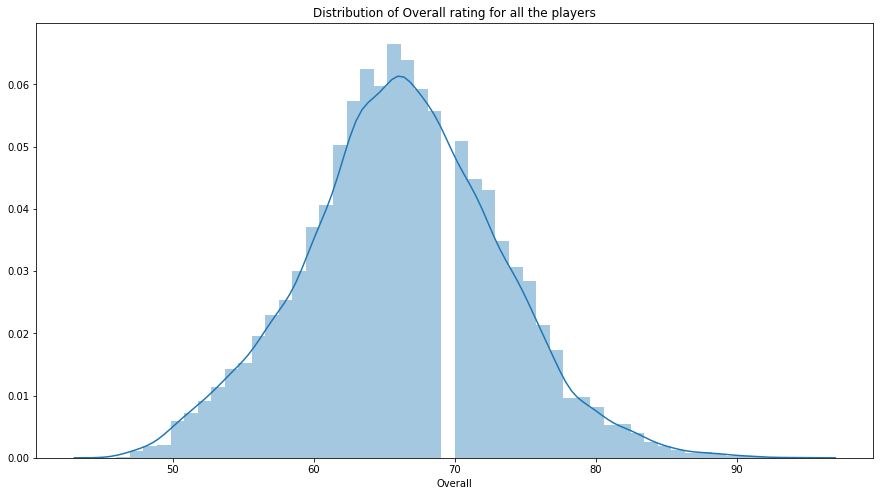

In [29]:
plt.figure(figsize=(15,8))
sns.distplot(fifa.Overall)
plt.title('Distribution of Overall rating for all the players')
plt.show()

## 2.	Generate pair plots for the following variables:
Overall, Value, Wage, International Reputation, Height, Weight, Release Clause


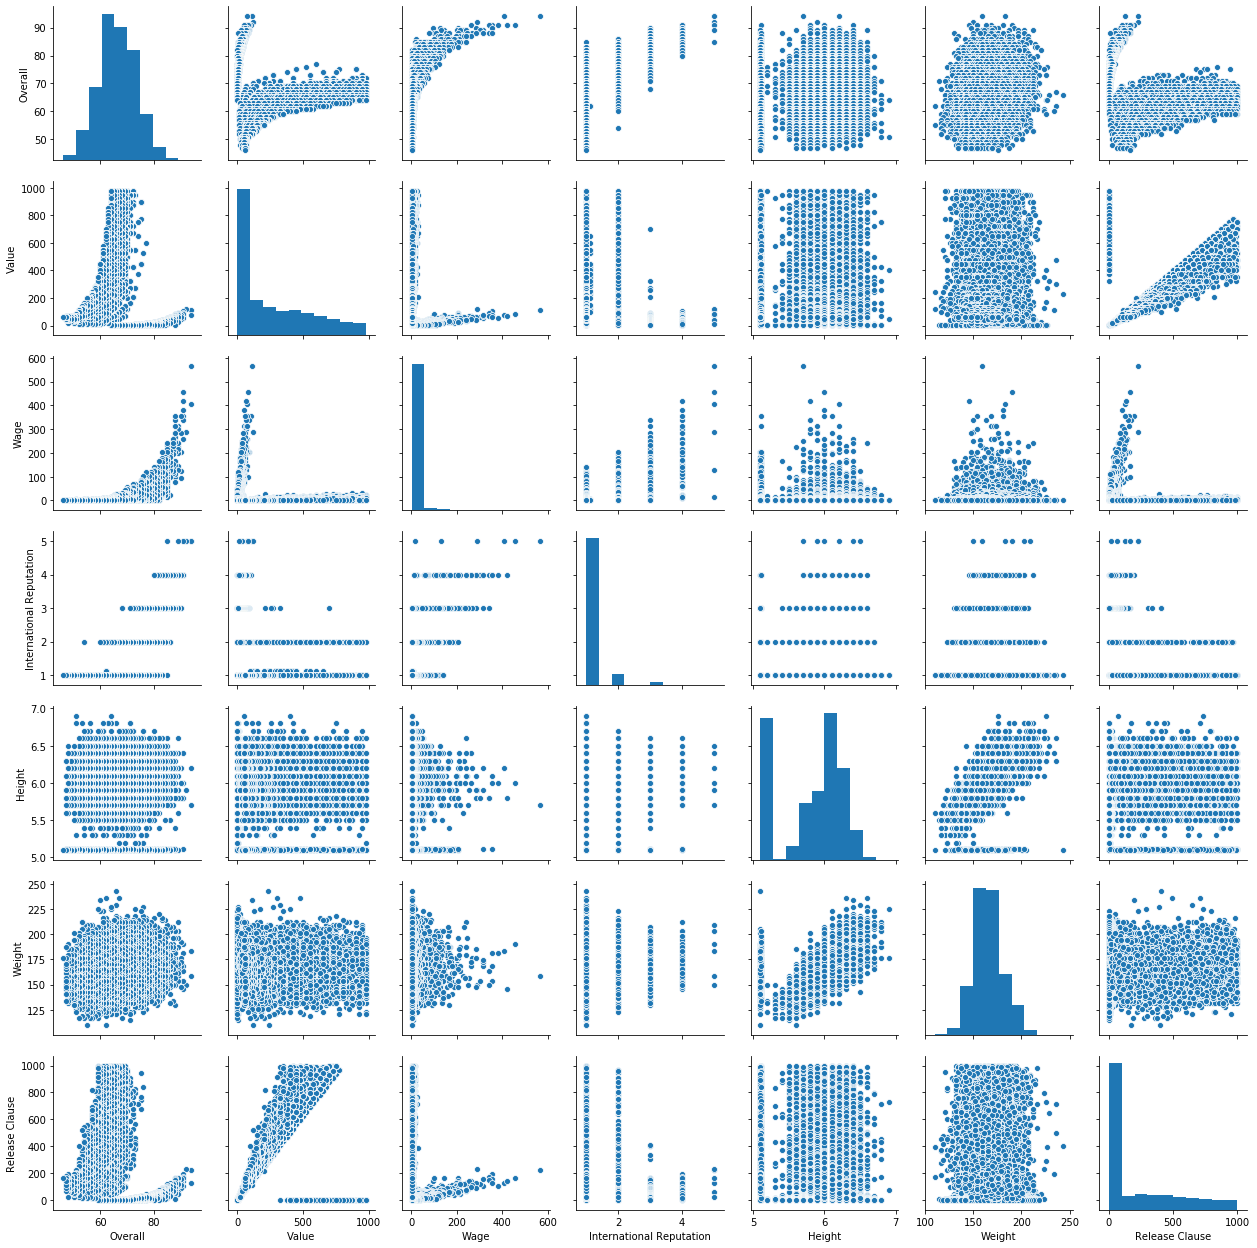

In [31]:
sns.pairplot(data=fifa,x_vars=['Overall', 'Value', 'Wage', 'International Reputation', 'Height', 'Weight', 'Release Clause'],y_vars=['Overall', 'Value', 'Wage', 'International Reputation', 'Height', 'Weight', 'Release Clause'])
plt.show()

## 3.	Generate a table containing the top 20 players ranked by Overall score and whose contract expires in 2020.

In [112]:
x=list(fifa[fifa['Contract Valid Until']=='2020-01-01']['Overall'].sort_values(ascending=False).head(20).index)
fifa_new=fifa.iloc[x]

### a)	What would the average wage for this set of players be?

In [116]:
fifa_new['Wage'].mean()

205.15

### b)	What is the average age?

In [118]:
fifa_new['Age'].mean()

29.95

### c)	Is there a correlation between the Overall rating and Value for these players?

In [126]:
fifa_new['Value'].corr(fifa['Overall'])

0.6667878068079505

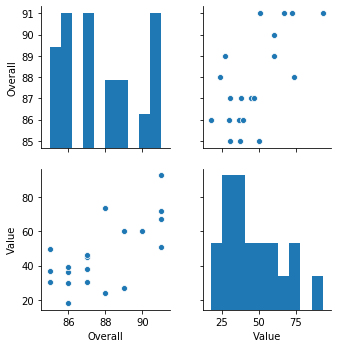

In [129]:
sns.pairplot(data=fifa_new,x_vars=['Overall','Value'],y_vars=['Overall','Value'])
plt.show()

#### Yes there is a correlation between Overall and Value for these players. That is when the overall increases, the value is also getting increased.

## 4.	Generate tables containing the top 5 players by Overall rating for each unique position.

In [149]:
d=fifa['Position'].unique()
d

array(['RF', 'ST', 'LW', 'GK', 'RCM', 'LF', 'RS', 'RCB', 'LCM', 'CB',
       'LDM', 'CAM', 'CDM', 'LS', 'LCB', 'RM', 'LAM', 'LM', 'LB', 'RDM',
       'RW', 'CM', 'RB', 'RAM', 'CF', 'RWB', 'LWB', nan], dtype=object)

In [227]:
d=fifa['Position'].unique()
x=[]
for i in d:
    x.extend(list(fifa[fifa['Position']==i]['Overall'].sort_values(ascending=False).head(5).index))
new=fifa.iloc[x]
new.head()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,110.5,565.0,Left,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,226.5
50,175943,D. Mertens,31,Belgium,87,87,Napoli,45.0,135.0,Right,...,81.0,25.0,40.0,40.0,7.0,10.0,8.0,10.0,4.0,76.5
528,172114,D. Valeri,32,Argentina,80,80,Portland Timbers,11.5,12.0,Right,...,83.0,39.0,40.0,30.0,15.0,15.0,8.0,10.0,12.0,17.3
890,150516,L. Podolski,33,Germany,78,78,Vissel Kobe,6.5,11.0,Left,...,79.0,54.0,39.0,39.0,10.0,9.0,16.0,9.0,9.0,8.1
1774,201313,C. Ciano,28,Italy,75,75,Frosinone,6.5,17.0,Left,...,74.0,24.0,23.0,20.0,9.0,12.0,9.0,9.0,7.0,11.7


### a)	Are there any players appearing in more than one Table. Please point out such players.

In [211]:
new['Name'].unique().shape

(135,)

In [228]:
new.shape

(135, 57)

### b)	What is the average wage one can expect to pay for the top 5 in every position?

In [225]:
d=fifa['Position'].unique()
for i in d:
    print('Position :',i,'/  Average-Wage :',new[new['Position']==i]['Wage'].mean(),'\n')

Position : RF /  Average-Wage : 148.0 

Position : ST /  Average-Wage : 294.0 

Position : LW /  Average-Wage : 261.0 

Position : GK /  Average-Wage : 192.8 

Position : RCM /  Average-Wage : 240.8 

Position : LF /  Average-Wage : 123.2 

Position : RS /  Average-Wage : 132.2 

Position : RCB /  Average-Wage : 231.0 

Position : LCM /  Average-Wage : 184.4 

Position : CB /  Average-Wage : 139.6 

Position : LDM /  Average-Wage : 126.6 

Position : CAM /  Average-Wage : 174.0 

Position : CDM /  Average-Wage : 217.0 

Position : LS /  Average-Wage : 130.2 

Position : LCB /  Average-Wage : 162.0 

Position : RM /  Average-Wage : 131.4 

Position : LAM /  Average-Wage : 81.6 

Position : LM /  Average-Wage : 164.6 

Position : LB /  Average-Wage : 177.2 

Position : RDM /  Average-Wage : 105.0 

Position : RW /  Average-Wage : 202.0 

Position : CM /  Average-Wage : 130.6 

Position : RB /  Average-Wage : 155.4 

Position : RAM /  Average-Wage : 45.4 

Position : CF /  Average-Wage : 